In [1]:
# # 사이킷런 1.0 이상 사용 권장
# !pip install scikit-learn --upgrade

In [2]:
import sklearn
sklearn.__version__

'1.1.1'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 간단한 예제 문서

In [4]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."]

In [5]:
df = pd.DataFrame(corpus, columns=['문서'])
df

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
1,지하철 운행시간과 지하철 요금 문의입니다.
2,지하철 승강장 문의입니다.
3,코로나 선별진료소 문의입니다.
4,버스 운행시간 문의입니다.
5,버스 터미널 위치 안내입니다.
6,코로나 거리두기 안내입니다.
7,택시 승강장 문의입니다.


## 정답 데이터 만들기
'코로나'가 들어가면 '보건'으로 그 외는 '교통'으로 레이블링

In [6]:
df.loc[df['문서'].str.contains('코로나'), '분류'] = '보건'
df.loc[~df['문서'].str.contains('코로나'), '분류'] = '교통'
df.head()

,문서,분류
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통


In [7]:
# 파이썬을 이용한 방법
# 훨씬 빠름!!!

data = [[text, '보건'] if '코로나' in text else [text, '교통'] for text in corpus]
df = pd.DataFrame(data, columns=['문서', '분류'])
df.head()

,문서,분류
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통


In [8]:
# 정답 값 빈도수 확인
df["분류"].value_counts()

교통    5
보건    3
Name: 분류, dtype: int64

## 텍스트 벡터화
텍스트 데이터를 수치 형태로 변경

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

# DTM(Document-Term matrix)
dtm = cvect.fit_transform(df['문서'])

### DTM(Document-Term Matrix)

In [10]:
# 피처 가져오기
feature_names = cvect.get_feature_names_out()
feature_names

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [11]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=feature_names)
dtm_df

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## 데이터셋 나누기
문제(X)와 정답(y) 만들고, 데이터셋(train,test) 나누기

In [12]:
# 독립변수 X
X = dtm.toarray()

# 종속변수 y
y = df['분류']

display(X)
display(y)

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

0    보건
1    교통
2    교통
3    보건
4    교통
5    교통
6    보건
7    교통
Name: 분류, dtype: object

In [13]:
# train : test = 80% : 20%
split_count = int(X.shape[0] * 0.8)

X_train = X[:split_count]
y_train = y[:split_count]
X_test = X[split_count:]
y_test = y[split_count:]

# 확인
print(X.shape, y.shape)
print(X_train.shape, y_train.shape, '-> train-set shape')
print(X_test.shape, y_test.shape, '-> test-set shape')

(8, 16) (8,)
(6, 16) (6,) -> train-set shape
(2, 16) (2,) -> test-set shape


In [14]:
# 아님 그냥 편하게 sklearn.model_selection의 train_test_split 이용해도 됨
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 머신러닝 모델

### 학습&예측

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array(['교통', '교통'], dtype=object)

### 평가
정확도(accuracy) 측정

In [16]:
(y_test == y_pred).mean()

1.0

In [17]:
# sklearn.metrics 의 accuracy_score로 구할 수도 있다
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [18]:
# confusion matrix
pd.crosstab(y_test, y_pred)

col_0,교통
분류,
교통,2


In [19]:
# sklearn.metrics의 confusion_matrix로 구할 수도 있다
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2]], dtype=int64)

### 트리 알고리즘 분석
의사결정나무((DecisionTree) 시각화

In [20]:
feature_names

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [21]:
# export_text로 트리 분석
from sklearn.tree import export_text

print(export_text(model))

|--- feature_13 <= 0.50
|   |--- class: 교통
|--- feature_13 >  0.50
|   |--- class: 보건



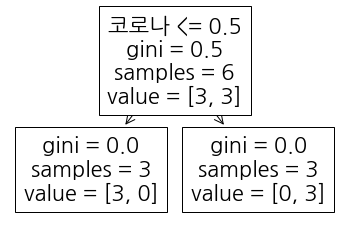

In [22]:
# plot_tree로 시각화
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names);

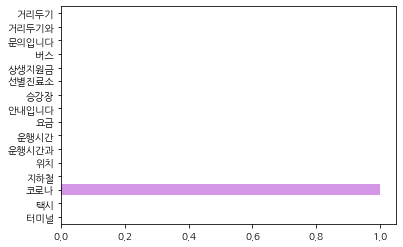

In [23]:
# feature_importances_로 피처 중요도 확인
sns.barplot(x=model.feature_importances_, y=feature_names);